In [87]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# import data
data_file = 'QCFilteredData.csv'
data = pd.read_csv(data_file, header=0, usecols=[3,4,5,6,7,8,9,10,11,12], 
                   names=['lat','lon','pres','temp','sal','oxy','nitr','phsp','sili','month'])


In [39]:
# print raw data
data

,lat,lon,pres,temp,sal,oxy,nitr,phsp,sili,month
0,-45.000,146.2200,4.1,15.7440,35.4240,241.6,2.37,0.140,0.15,1
1,-45.000,146.2200,22.0,15.5310,35.3940,241.8,2.54,0.150,0.18,1
2,-45.000,146.2200,51.5,14.4770,35.2600,239.1,4.68,0.280,0.66,1
3,-45.000,146.2200,202.8,12.3210,35.1620,224.9,10.52,0.590,2.74,1
4,-45.000,146.2200,498.6,9.0490,34.6360,247.7,16.62,0.960,4.25,1
...,...,...,...,...,...,...,...,...,...,...
42407,-60.013,-30.8953,1697.8,0.0694,34.6681,218.5,32.60,2.251,121.10,1
42408,-60.013,-30.8953,1996.5,-0.0152,34.6641,222.7,32.40,2.247,121.90,1
42409,-60.013,-30.8953,2299.0,-0.0551,34.6618,224.9,32.50,2.247,122.90,1
42410,-60.013,-30.8953,2597.7,-0.0707,34.6601,226.8,32.40,2.248,123.80,1


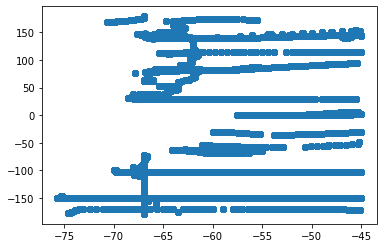

In [42]:
plt.scatter(data['lat'],data['lon'])

In [43]:
data["rad_lat"] = np.radians(data["lat"])
data["rad_lon"] = np.radians(data["lon"])
data

,lat,lon,pres,temp,sal,oxy,nitr,phsp,sili,month,rad_lat,rad_lon
0,-45.000,146.2200,4.1,15.7440,35.4240,241.6,2.37,0.140,0.15,1,-0.785398,2.552020
1,-45.000,146.2200,22.0,15.5310,35.3940,241.8,2.54,0.150,0.18,1,-0.785398,2.552020
2,-45.000,146.2200,51.5,14.4770,35.2600,239.1,4.68,0.280,0.66,1,-0.785398,2.552020
3,-45.000,146.2200,202.8,12.3210,35.1620,224.9,10.52,0.590,2.74,1,-0.785398,2.552020
4,-45.000,146.2200,498.6,9.0490,34.6360,247.7,16.62,0.960,4.25,1,-0.785398,2.552020
...,...,...,...,...,...,...,...,...,...,...,...,...
42407,-60.013,-30.8953,1697.8,0.0694,34.6681,218.5,32.60,2.251,121.10,1,-1.047424,-0.539225
42408,-60.013,-30.8953,1996.5,-0.0152,34.6641,222.7,32.40,2.247,121.90,1,-1.047424,-0.539225
42409,-60.013,-30.8953,2299.0,-0.0551,34.6618,224.9,32.50,2.247,122.90,1,-1.047424,-0.539225
42410,-60.013,-30.8953,2597.7,-0.0707,34.6601,226.8,32.40,2.248,123.80,1,-1.047424,-0.539225


In [44]:
#trying cluster method for lat/lon
from sklearn.cluster import KMeans ,AgglomerativeClustering

# creates 10 clusters using k-means clustering algorithm.
kmeans = KMeans(10)
clusters = kmeans.fit_predict(data[['lat','lon']])
data['cluster'] = kmeans.predict(data[['lat','lon']])

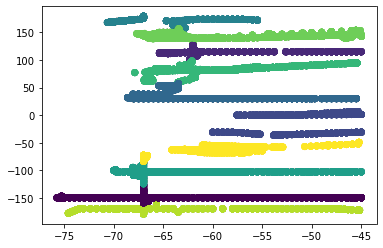

In [45]:
plt.scatter(data['lat'],data['lon'],c=data['cluster'])

In [46]:
# standardize data
from sklearn.preprocessing import StandardScaler

data_scaled = data.copy()

col_names = ['pres','temp','sal','oxy','nitr','phsp','sili']
features = data_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_scaled[col_names] = features

#encode months using sin/cos transformation

data_scaled['month_sin'] = np.sin((2*np.pi* data_scaled['month'])/max(data_scaled['month']))
data_scaled['month_cos'] = np.cos((2*np.pi*data_scaled['month'])/max(data_scaled['month']))
data_scaled.drop('month',axis=1,inplace=True)
data_scaled.drop('cluster',axis=1,inplace=True)

data_scaled

,lat,lon,pres,temp,sal,oxy,nitr,phsp,sili,rad_lat,rad_lon,month_sin,month_cos
0,-45.000,146.2200,-0.967296,5.592470,3.041097,0.210208,-5.300686,-5.484854,-2.005782,-0.785398,2.552020,0.5,0.866025
1,-45.000,146.2200,-0.953505,5.507665,2.941475,0.214179,-5.267945,-5.456219,-2.005030,-0.785398,2.552020,0.5,0.866025
2,-45.000,146.2200,-0.930776,5.088020,2.496495,0.160573,-4.855791,-5.083957,-1.992991,-0.785398,2.552020,0.5,0.866025
3,-45.000,146.2200,-0.814206,4.229619,2.171062,-0.121352,-3.731035,-4.196255,-1.940821,-0.785398,2.552020,0.5,0.866025
4,-45.000,146.2200,-0.586305,2.926888,0.424349,0.331317,-2.556204,-3.136739,-1.902948,-0.785398,2.552020,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42407,-60.013,-30.8953,0.337627,-0.648296,0.530945,-0.248417,0.521467,0.560110,1.027831,-1.047424,-0.539225,0.5,0.866025
42408,-60.013,-30.8953,0.567762,-0.681979,0.517662,-0.165031,0.482948,0.548656,1.047896,-1.047424,-0.539225,0.5,0.866025
42409,-60.013,-30.8953,0.800826,-0.697865,0.510025,-0.121352,0.502208,0.548656,1.072978,-1.047424,-0.539225,0.5,0.866025
42410,-60.013,-30.8953,1.030961,-0.704076,0.504379,-0.083630,0.482948,0.551520,1.095551,-1.047424,-0.539225,0.5,0.866025


In [47]:
# separate independent and dependent variables
y1 = data_scaled['phsp']
y2 = data_scaled['sili']
X = data_scaled[['pres','temp','sal','oxy','nitr','rad_lat','rad_lon','month_sin','month_cos']]

covariance matrix: 
 [[ 1.00000000e+00 -2.76989199e-01  5.16102658e-01 -3.73142241e-01
   3.87685914e-01  7.32960040e-03 -1.66473503e-01  3.21762938e-04
  -2.52739679e-02]
 [-2.76989199e-01  1.00000000e+00 -6.09879738e-02 -5.73741522e-03
  -7.32081931e-01  8.35080555e-02 -6.31528780e-02 -4.25900816e-03
  -6.11725536e-03]
 [ 5.16102658e-01 -6.09879738e-02  1.00000000e+00 -8.20150498e-01
   4.28080555e-01 -8.78519410e-03 -3.14003084e-02 -2.36023243e-03
  -1.98989514e-02]
 [-3.73142241e-01 -5.73741522e-03 -8.20150498e-01  1.00000000e+00
  -5.88896601e-01 -5.40112777e-03  3.02780547e-01 -2.07342966e-02
   6.27278520e-02]
 [ 3.87685914e-01 -7.32081931e-01  4.28080555e-01 -5.88896601e-01
   1.00000000e+00 -4.96062943e-02 -1.02818336e-01  7.82273273e-03
  -2.27137092e-02]
 [ 7.32960040e-03  8.35080555e-02 -8.78519410e-03 -5.40112777e-03
  -4.96062943e-02  1.73647766e-02  3.88289729e-02 -4.37578729e-03
   1.11835404e-02]
 [-1.66473503e-01 -6.31528780e-02 -3.14003084e-02  3.02780547e-01
  -1.02

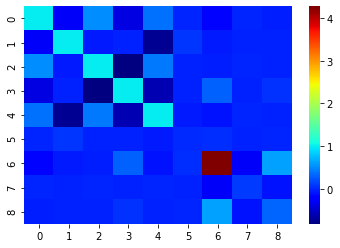

In [48]:
### print covariance matrix of features
from sklearn.covariance import EmpiricalCovariance
import seaborn as sns

cov = EmpiricalCovariance().fit(X)
print("covariance matrix: \n", cov.covariance_)
ax = sns.heatmap(cov.covariance_, cmap="jet")

In [54]:
# linear regression for phosphate
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X, y1)

print("score: ", reg1.score(X, y1))
print(X.columns)
print("coefficients: ", reg1.coef_)
print("intercept: ", reg1.intercept_)

score:  0.9731013382072077
Index(['pres', 'temp', 'sal', 'oxy', 'nitr', 'rad_lat', 'rad_lon', 'month_sin',
       'month_cos'],
      dtype='object')
coefficients:  [ 0.01009329 -0.12203556 -0.02533663 -0.13403319  0.82817918  0.13580293
 -0.00530235  0.10471186  0.00451095]
intercept:  0.06949708537258764


In [53]:
# linear regression for silicate
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression().fit(X, y2)

print("score: ", reg2.score(X, y2))
print(X.columns)
print("coefficients: ", reg2.coef_)
print("intercept: ", reg2.intercept_)

score:  0.947942634247373
Index(['pres', 'temp', 'sal', 'oxy', 'nitr', 'rad_lat', 'rad_lon', 'month_sin',
       'month_cos'],
      dtype='object')
coefficients:  [ 0.37944372 -0.57895128  0.25361767 -0.3783103  -0.23119768 -1.35875186
  0.01154511  0.11187811  0.01429158]
intercept:  -1.5016001405840582


In [99]:
data_shuffled = data_scaled.copy()
np.random.shuffle(data_shuffled.values)

data_shuffled

,lat,lon,pres,temp,sal,oxy,nitr,phsp,sili,rad_lat,rad_lon,month_sin,month_cos
0,-66.2752,64.4998,0.801750,-0.752769,0.521979,0.031523,0.417466,0.184985,1.042880,-1.156720,1.125734,5.000000e-01,0.866025
1,-63.5350,82.0005,0.266206,-0.283316,0.694658,-0.466810,0.294205,0.385434,0.659132,-1.108895,1.431179,8.660254e-01,0.500000
2,-62.7801,-63.7000,1.599173,-0.506954,0.609315,-0.377468,0.700581,0.528611,1.210675,-1.095719,-1.111775,8.660254e-01,0.500000
3,-69.0006,-149.9994,-0.608879,-0.130468,0.741149,-0.921465,0.554208,0.442705,0.608969,-1.204288,-2.617983,8.660254e-01,-0.500000
4,-49.6980,90.8160,-0.912285,1.899554,-1.799554,1.318056,-2.203755,-1.848139,-1.945085,-0.867394,1.585038,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42407,-61.9382,115.0723,-0.377511,0.044516,0.737496,-0.814849,0.276871,0.299527,0.116618,-1.081026,2.008391,-2.449294e-16,1.000000
42408,-63.8997,150.0007,-0.507795,0.029387,0.731850,-0.806113,0.192129,0.299527,0.220205,-1.115260,2.618006,5.000000e-01,0.866025
42409,-67.0001,-107.1501,-0.650792,0.209866,0.061724,-1.092208,0.839249,0.900873,-0.225243,-1.169372,-1.870122,8.660254e-01,-0.500000
42410,-49.0084,-169.9429,-0.953197,3.653503,-1.056703,0.905094,-3.457550,-3.337188,-1.990984,-0.855358,-2.966063,8.660254e-01,0.500000


In [109]:
#new X and Y
# separate independent and dependent variables
y1_train = data_shuffled['phsp']
y1_train = y1_train[0:40000]
y1_test = data_shuffled['phsp']
y1_test = y1_test[40001:]

y2_train = data_shuffled['sili']
y2_train = y2_train[0:40000]
y2_test = data_shuffled['sili']
y2_test = y2_test[40001:]

X_train = data_shuffled[['pres','temp','sal','oxy','nitr','rad_lat','rad_lon','month_sin','month_cos']]
X_train = X_train[0:40000]
X_test = data_shuffled[['pres','temp','sal','oxy','nitr','rad_lat','rad_lon','month_sin','month_cos']]
X_test = X_test[40001:]

Coefficients: 
 [ 0.01026221 -0.12328737 -0.02607161 -0.13620815  0.82634701  0.1363954
 -0.00538721  0.10419276  0.00474575]
Score:  0.9729481210446169
Mean squared error: 0.03
Coefficient of determination: 0.97


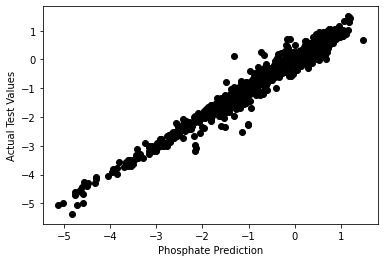

In [117]:
#Predict phosphate w/test vs train set

from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr1 = LinearRegression()

# Train the model using the training sets
regr1.fit(X_train, y1_train)

# Make predictions using the testing set
phsp_pred = regr1.predict(X_test)

# The coefficients
print('Coefficients: \n', regr1.coef_)
#score
print("Score: ", regr1.score(X_test,y1_test))
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, phsp_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, phsp_pred))

# Plot outputs
plt.scatter(phsp_pred, y1_test,  color='black')
#plt.plot(X_test, phsp_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.xlabel("Phosphate Prediction")
plt.ylabel("Actual Test Values")
plt.show()


Coefficients: 
 [ 0.38013871 -0.58021929  0.25099979 -0.38184094 -0.23406103 -1.3651621
  0.01157964  0.11220483  0.01609049]
Score:  0.9481512925188996
Mean squared error: 0.05
Coefficient of determination: 0.55


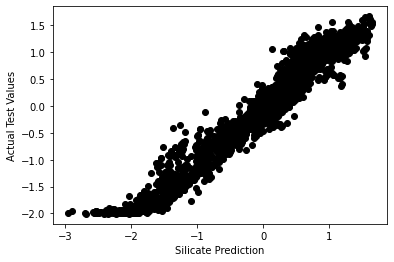

In [116]:
#predict silicate with test/train set

from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr2 = LinearRegression()

# Train the model using the training sets
regr2.fit(X_train, y2_train)

# Make predictions using the testing set
sil_pred = regr2.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
#Score
print("Score: ", regr2.score(X_test,y2_test))
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, sil_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y2_test, phsp_pred))

# Plot outputs
plt.scatter(sil_pred, y2_test,  color='black')
#plt.plot(X_test, phsp_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.xlabel("Silicate Prediction")
plt.ylabel("Actual Test Values")
plt.show()
